<a href="https://www.kaggle.com/code/amirn21/jet-engine-superalloy-data-analysis?scriptVersionId=106249581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv("/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD001.txt", header=None, sep=" ")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13096 non-null  int64  
 1   1       13096 non-null  int64  
 2   2       13096 non-null  float64
 3   3       13096 non-null  float64
 4   4       13096 non-null  float64
 5   5       13096 non-null  float64
 6   6       13096 non-null  float64
 7   7       13096 non-null  float64
 8   8       13096 non-null  float64
 9   9       13096 non-null  float64
 10  10      13096 non-null  float64
 11  11      13096 non-null  float64
 12  12      13096 non-null  float64
 13  13      13096 non-null  float64
 14  14      13096 non-null  float64
 15  15      13096 non-null  float64
 16  16      13096 non-null  float64
 17  17      13096 non-null  float64
 18  18      13096 non-null  float64
 19  19      13096 non-null  float64
 20  20      13096 non-null  float64
 21  21      13096 non-null  int64  
 22

In [7]:
df.shape

(13096, 28)

# Data Cleaning

## Add column names

In [8]:
col_names = ["unit_number", "time_in_cycles", "operational_setting_1", "operational_setting_2", "operational_setting_3"]

In [9]:
col_names

['unit_number',
 'time_in_cycles',
 'operational_setting_1',
 'operational_setting_2',
 'operational_setting_3']

In [10]:
for i in range(1,24):
    sensor_measurement = f"sensor_measurement_{i}"
    col_names.append(sensor_measurement)

In [11]:
col_names

['unit_number',
 'time_in_cycles',
 'operational_setting_1',
 'operational_setting_2',
 'operational_setting_3',
 'sensor_measurement_1',
 'sensor_measurement_2',
 'sensor_measurement_3',
 'sensor_measurement_4',
 'sensor_measurement_5',
 'sensor_measurement_6',
 'sensor_measurement_7',
 'sensor_measurement_8',
 'sensor_measurement_9',
 'sensor_measurement_10',
 'sensor_measurement_11',
 'sensor_measurement_12',
 'sensor_measurement_13',
 'sensor_measurement_14',
 'sensor_measurement_15',
 'sensor_measurement_16',
 'sensor_measurement_17',
 'sensor_measurement_18',
 'sensor_measurement_19',
 'sensor_measurement_20',
 'sensor_measurement_21',
 'sensor_measurement_22',
 'sensor_measurement_23']

In [12]:
df.columns = col_names

In [13]:
df.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


## Drop empty columns

In [14]:
df.drop(labels=["sensor_measurement_22", "sensor_measurement_23"], axis=1, inplace=True)

In [15]:
df.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


# Exploratory data analysis

Visualizing cycles per unit number. These are the number of cycles (flights) an engine can run for before failing.

<AxesSubplot:>

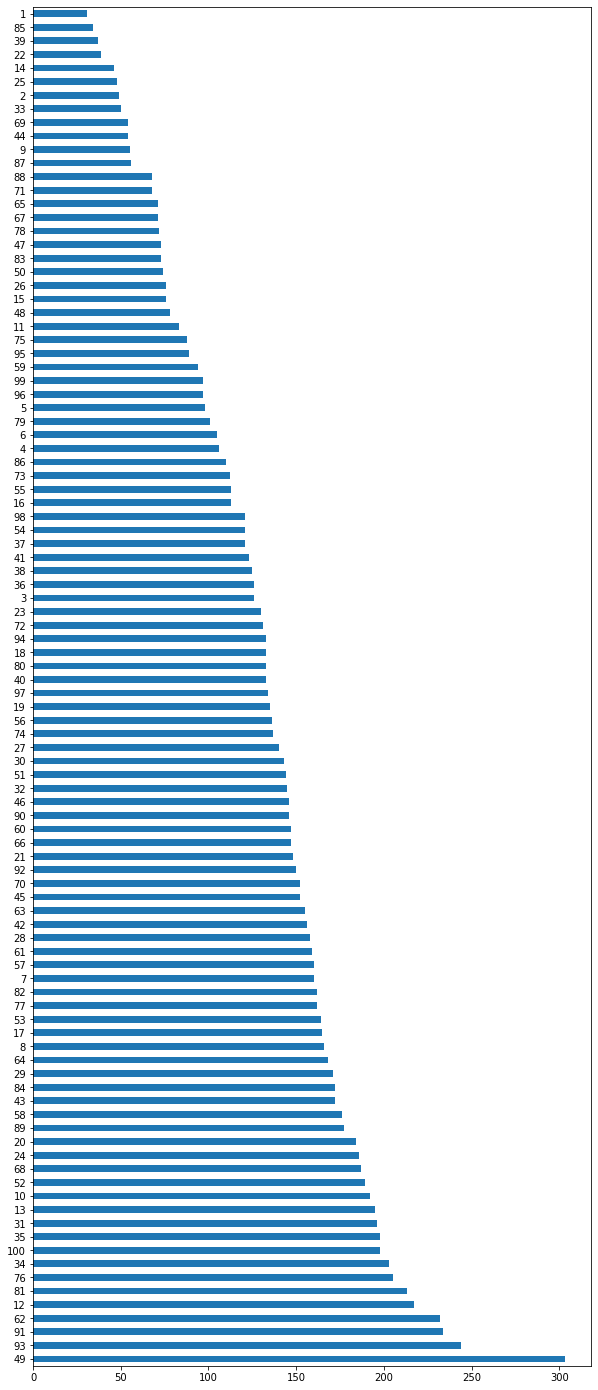

In [16]:
df['unit_number'].value_counts().plot(kind='barh', figsize=(10,25))

In [17]:
df_cycles_per_unit = df.groupby(["unit_number"]).max().reset_index()

Total number of units/engines in test data set.

In [18]:
df_cycles_per_unit['unit_number'].max()

100

In [19]:
df_cycles_per_unit.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,31,0.0047,0.0005,100.0,518.67,643.02,1594.29,1412.28,14.62,21.61,555.07,2388.11,9056.96,1.3,47.50,522.39,2388.12,8139.62,8.4577,0.03,393,2388,100.0,39.11,23.4572
1,2,49,0.0039,0.0005,100.0,518.67,643.33,1599.04,1416.93,14.62,21.61,554.54,2388.18,9055.90,1.3,47.67,522.23,2388.16,8137.07,8.4992,0.03,395,2388,100.0,39.03,23.5222
2,3,126,0.0076,0.0005,100.0,518.67,643.44,1600.07,1419.21,14.62,21.61,554.42,2388.21,9061.97,1.3,47.88,522.20,2388.21,8137.46,8.5043,0.03,396,2388,100.0,39.07,23.4232
3,4,106,0.0051,0.0005,100.0,518.67,643.48,1599.90,1418.38,14.62,21.61,554.54,2388.18,9062.95,1.3,47.71,522.37,2388.19,8139.14,8.4910,0.03,395,2388,100.0,39.06,23.4121
4,5,98,0.0062,0.0005,100.0,518.67,643.35,1598.76,1419.36,14.62,21.61,554.47,2388.19,9059.29,1.3,47.76,522.20,2388.19,8140.87,8.4885,0.03,395,2388,100.0,39.04,23.4622


In [20]:
sns.set(rc={'figure.figsize':(20,20)})

In [21]:
df_cycles_copy = df_cycles_per_unit.copy()

In [22]:
df_cycles_copy.drop(columns='unit_number', inplace=True)

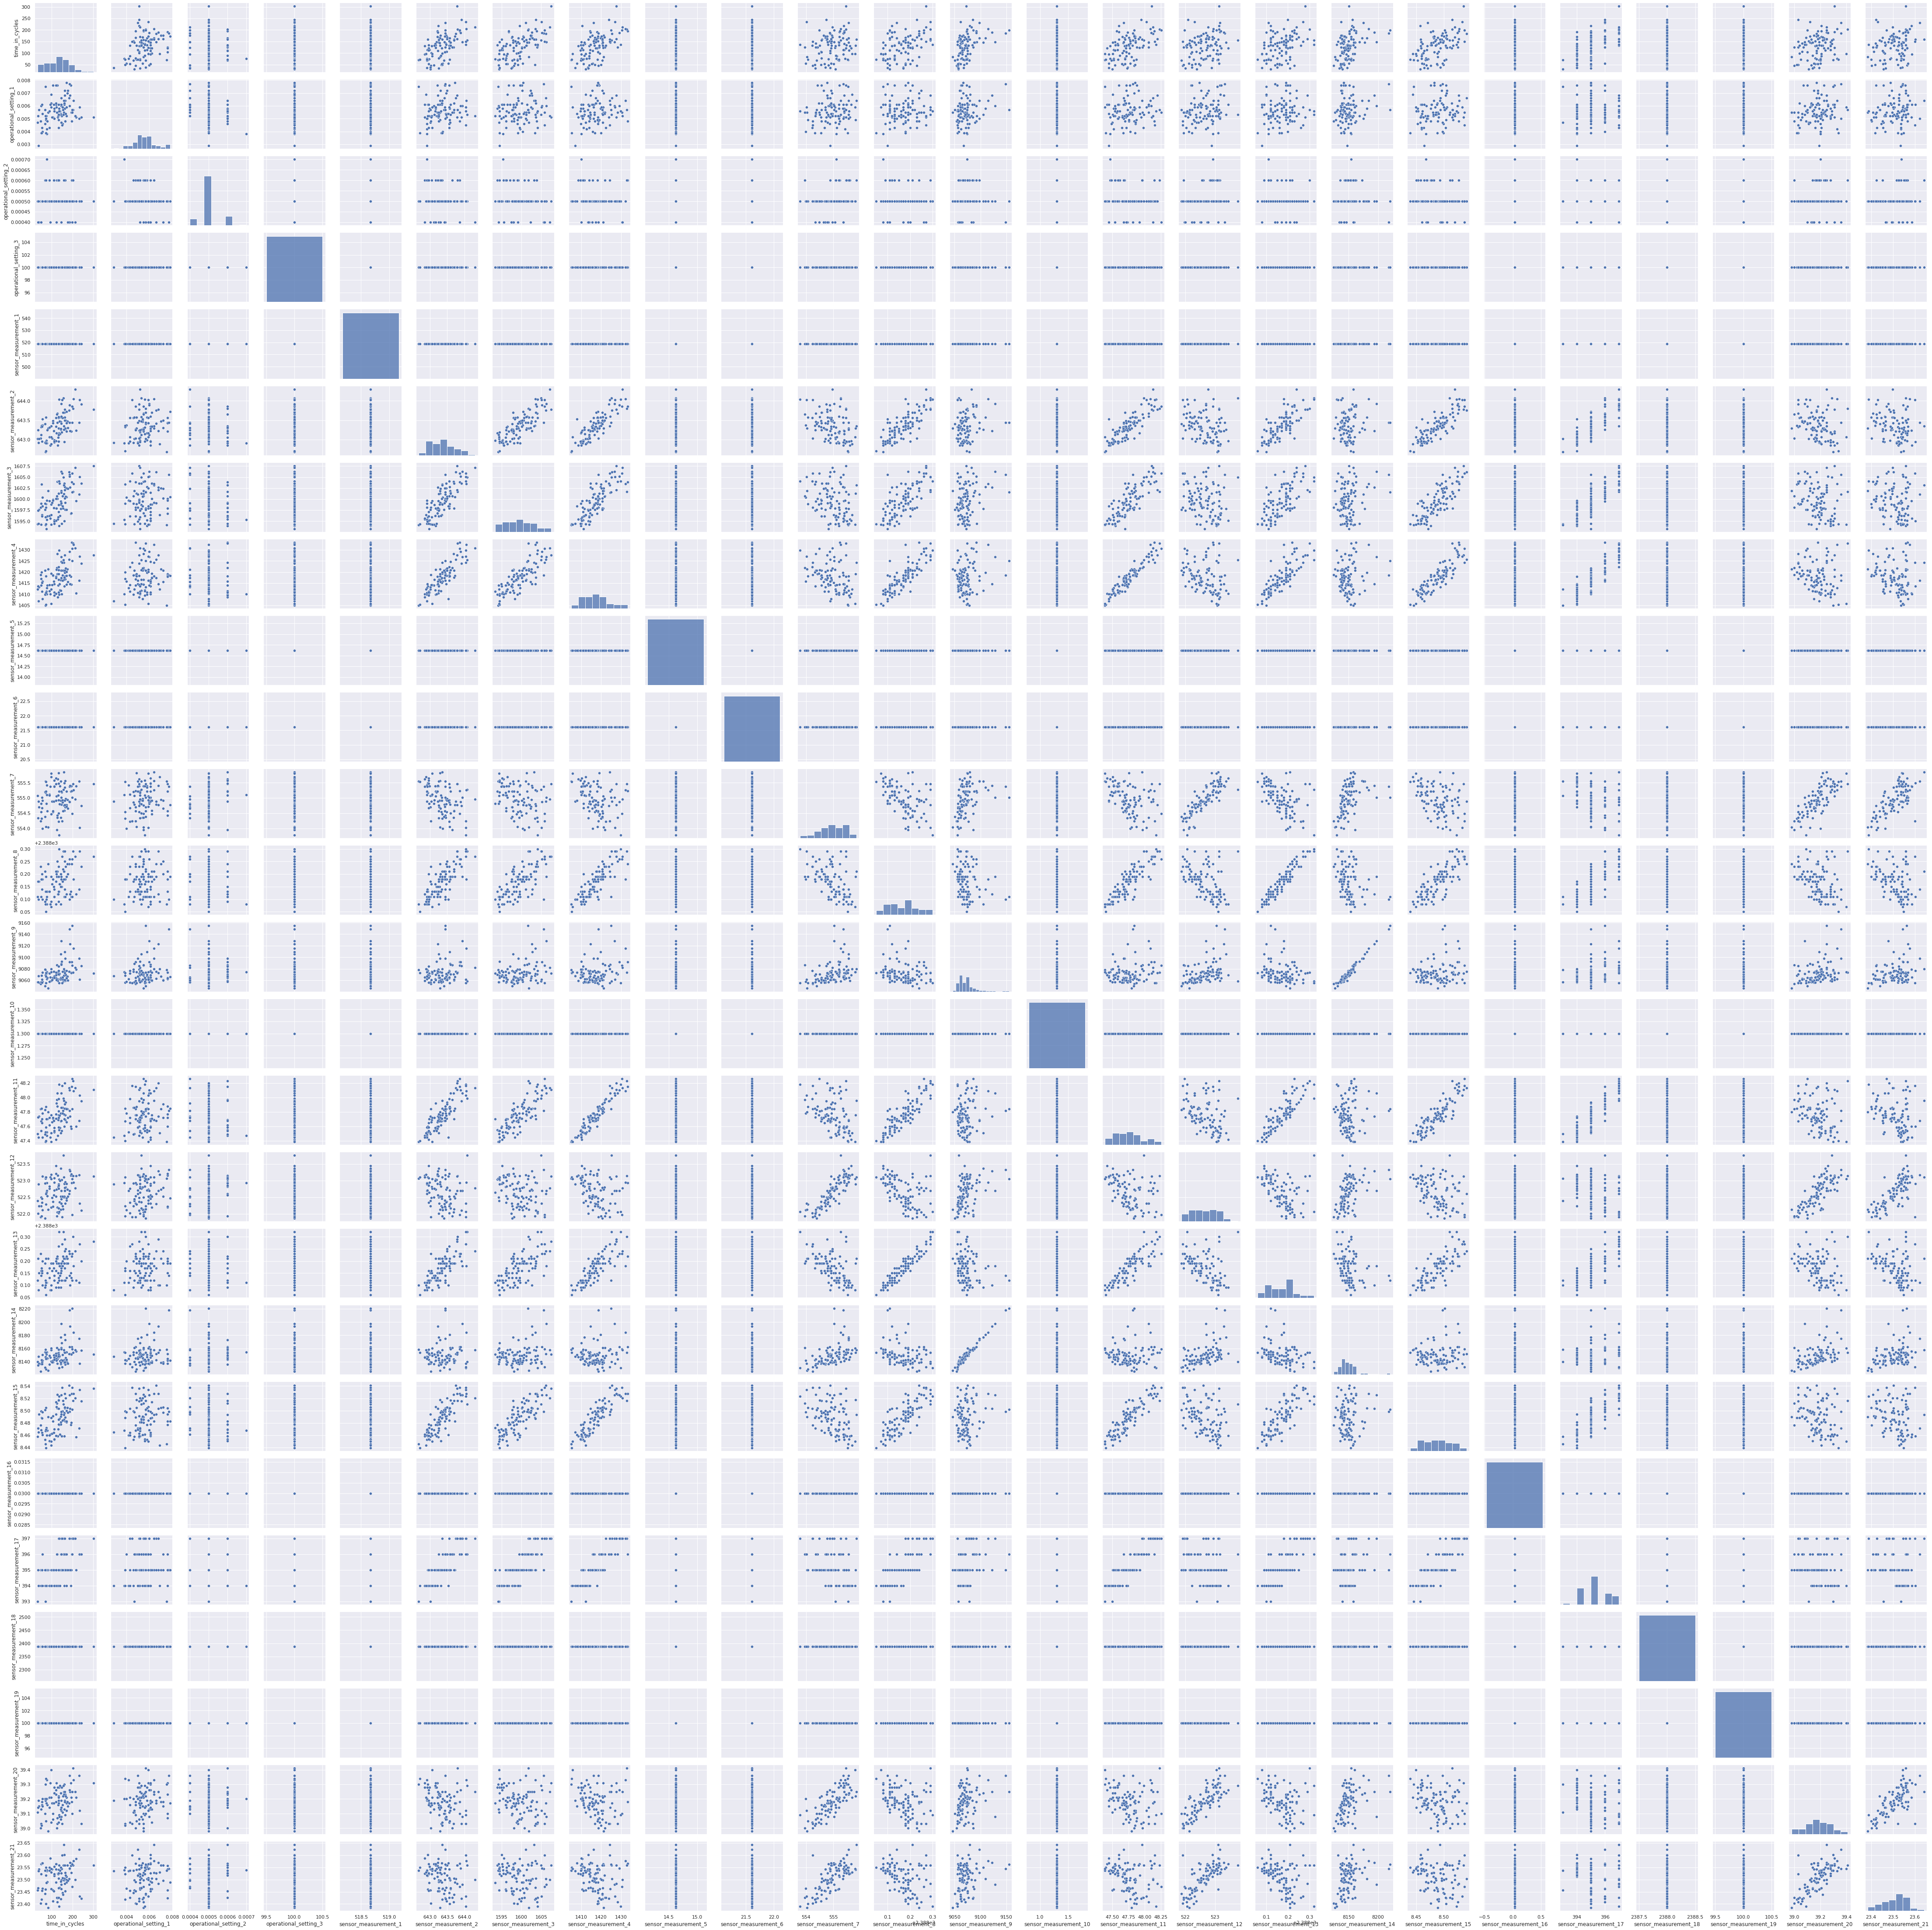

In [23]:
sns.pairplot(df_cycles_copy)

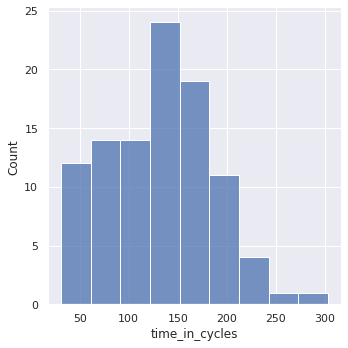

In [24]:
sns.displot(df_cycles_copy['time_in_cycles'])

<AxesSubplot:>

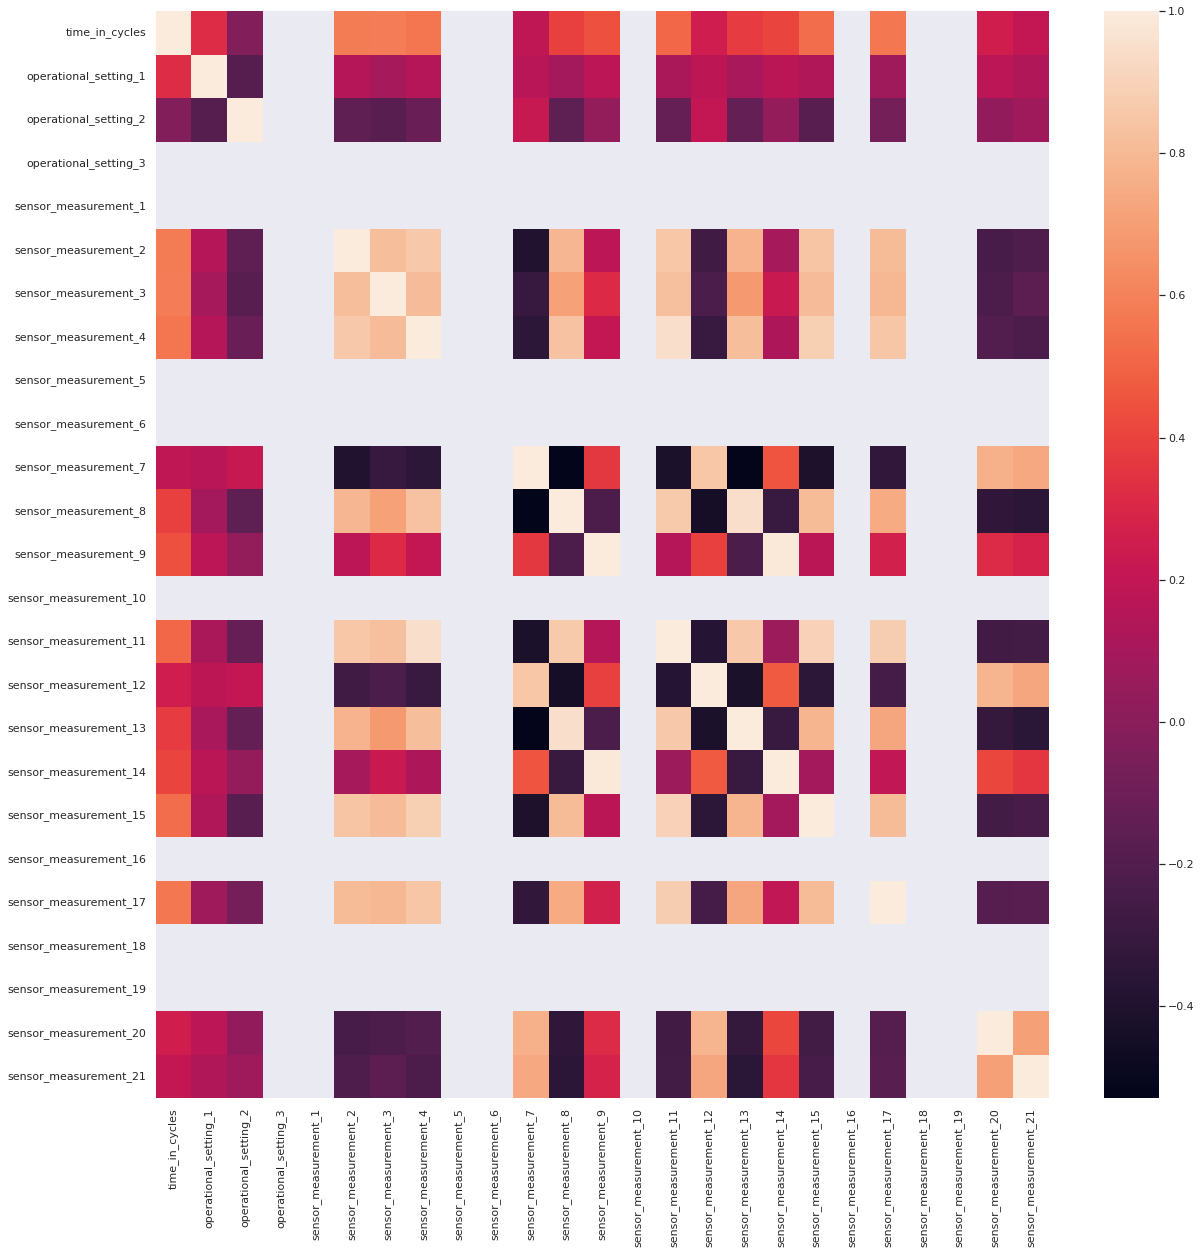

In [25]:

sns.heatmap(df_cycles_copy.corr())

## **The heatmap shows which parameters have a correlation with engine cycles.**

# Training a Linear Regression Model

In [26]:
# dataframe column names
col_names

['unit_number',
 'time_in_cycles',
 'operational_setting_1',
 'operational_setting_2',
 'operational_setting_3',
 'sensor_measurement_1',
 'sensor_measurement_2',
 'sensor_measurement_3',
 'sensor_measurement_4',
 'sensor_measurement_5',
 'sensor_measurement_6',
 'sensor_measurement_7',
 'sensor_measurement_8',
 'sensor_measurement_9',
 'sensor_measurement_10',
 'sensor_measurement_11',
 'sensor_measurement_12',
 'sensor_measurement_13',
 'sensor_measurement_14',
 'sensor_measurement_15',
 'sensor_measurement_16',
 'sensor_measurement_17',
 'sensor_measurement_18',
 'sensor_measurement_19',
 'sensor_measurement_20',
 'sensor_measurement_21',
 'sensor_measurement_22',
 'sensor_measurement_23']

In [27]:
# df.loc[:, df.columns != 'b']
x = df_cycles_copy.drop(columns='time_in_cycles')
y = df_cycles_copy['time_in_cycles']

In [28]:
x.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,0.0047,0.0005,100.0,518.67,643.02,1594.29,1412.28,14.62,21.61,555.07,2388.11,9056.96,1.3,47.50,522.39,2388.12,8139.62,8.4577,0.03,393,2388,100.0,39.11,23.4572
1,0.0039,0.0005,100.0,518.67,643.33,1599.04,1416.93,14.62,21.61,554.54,2388.18,9055.90,1.3,47.67,522.23,2388.16,8137.07,8.4992,0.03,395,2388,100.0,39.03,23.5222
2,0.0076,0.0005,100.0,518.67,643.44,1600.07,1419.21,14.62,21.61,554.42,2388.21,9061.97,1.3,47.88,522.20,2388.21,8137.46,8.5043,0.03,396,2388,100.0,39.07,23.4232
3,0.0051,0.0005,100.0,518.67,643.48,1599.90,1418.38,14.62,21.61,554.54,2388.18,9062.95,1.3,47.71,522.37,2388.19,8139.14,8.4910,0.03,395,2388,100.0,39.06,23.4121
4,0.0062,0.0005,100.0,518.67,643.35,1598.76,1419.36,14.62,21.61,554.47,2388.19,9059.29,1.3,47.76,522.20,2388.19,8140.87,8.4885,0.03,395,2388,100.0,39.04,23.4622


In [29]:
y.head()

0     31
1     49
2    126
3    106
4     98
Name: time_in_cycles, dtype: int64

## Train, Test, Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

# Create and Train Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluate the Model: Check coefficients and how to interpret them

In [35]:
# intercept
print(lm.intercept_)

540955162747.67053


In [36]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
operational_setting_1,4.869241e+03
operational_setting_2,-7.761411e+04
operational_setting_3,-5.478427e+03
sensor_measurement_1,-1.040710e+09
sensor_measurement_2,7.326529e+01
sensor_measurement_3,2.833559e+00
sensor_measurement_4,-1.100616e+00
sensor_measurement_5,1.623856e+07
sensor_measurement_6,-6.502929e+07
sensor_measurement_7,3.144793e+01


Interpreting the coefficients:

* There's a mix of positive and negative correlations between the parameters and engine cycles
* Operational setting 1 has a positive correlation of 4869, meaning for a 1 unit increase of operational_setting_1 there is a 4869 unit increase in engine cycles. This, however, does not seem logical and further investigation is required.
* Similarly, there seems to be a large absolute correlation between most of the parameters and engine cycles. Although there are a few parameters that seem to have no correlation with engine cycles (sensor measurement 14, 18, and 19).



# Predictions using the model and test dataset

In [37]:
predictions = lm.predict(X_test)

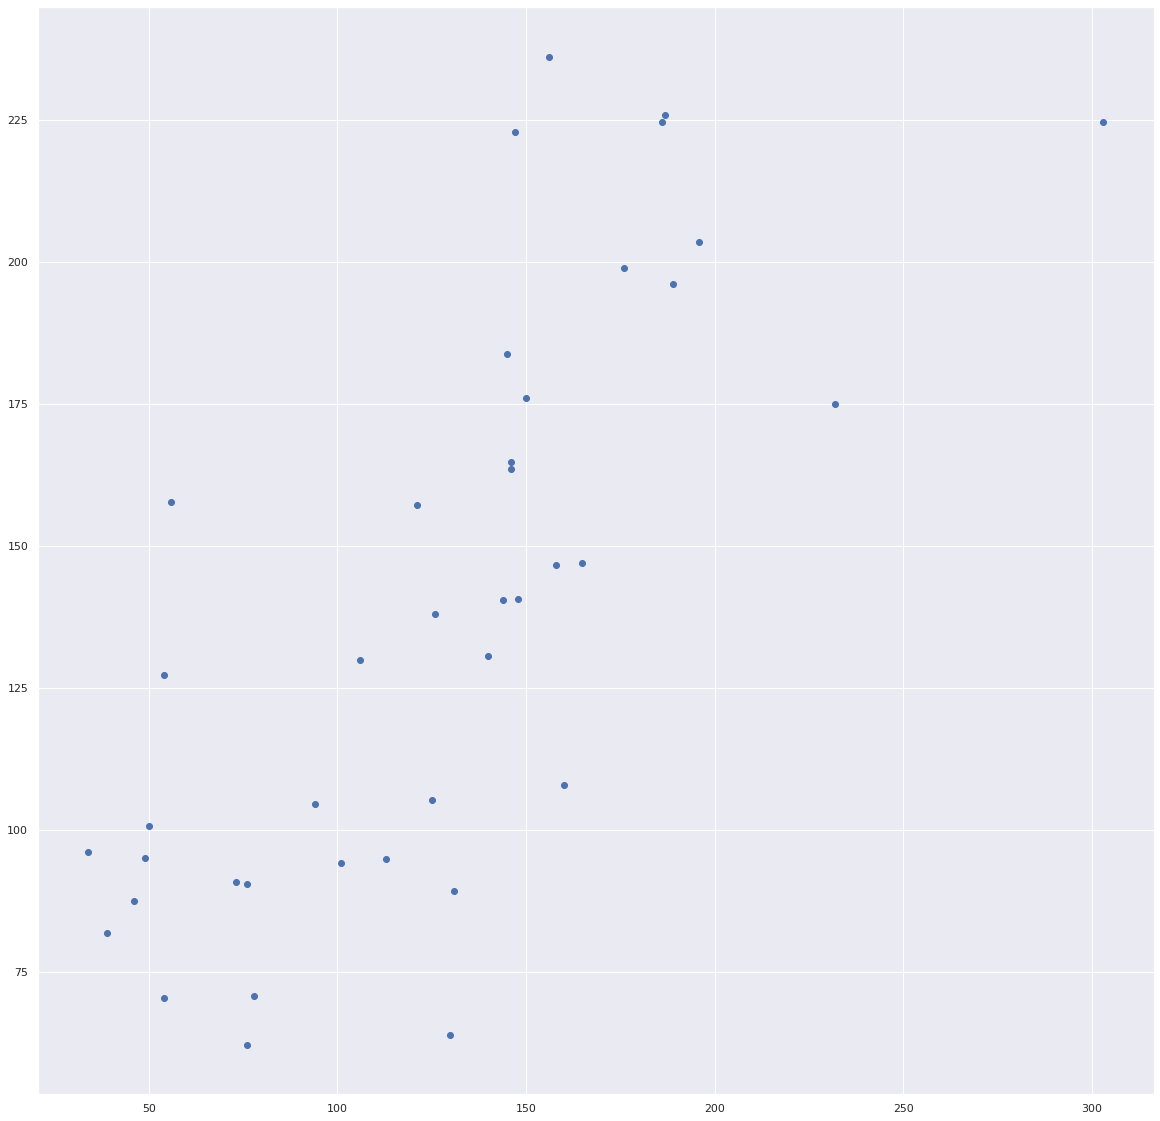

In [38]:
plt.scatter(y_test,predictions)

**Residual histogram**

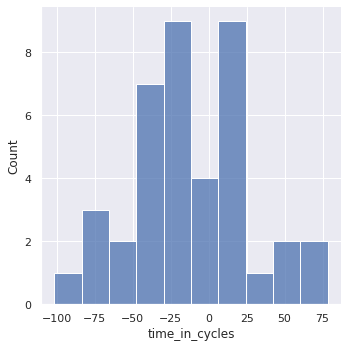

In [39]:
sns.displot((y_test-predictions),bins=10);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 33.29596099853516
MSE: 1729.2401729053818
RMSE: 41.58413366784718
